# Exploration Strategies: Epsilon-Greedy

## 📚 Learning Objectives

By completing this notebook, you will:
- Understand the exploration-exploitation dilemma
- Implement Epsilon-Greedy exploration strategy
- Visualize the impact of different epsilon values
- Compare exploration vs exploitation behavior
- Apply Epsilon-Greedy to RL problems

## 🔗 Prerequisites

- ✅ OpenAI Gym setup (previous notebook)
- ✅ Understanding of RL basics (actions, rewards, policies)
- ✅ Python knowledge (functions, loops, matplotlib)
- ✅ NumPy knowledge

---

## Official Structure Reference

This notebook covers practical activities from **Course 09, Unit 1**:
- Exploration strategies: programming Epsilon-Greedy strategy and visualizing its impact
- **Source:** `DETAILED_UNIT_DESCRIPTIONS.md` - Unit 1 Practical Content

---

## Introduction

**Exploration-Exploitation Dilemma**: RL agents must balance exploring new actions (to discover better rewards) with exploiting known good actions (to maximize rewards). **Epsilon-Greedy** is a simple but effective exploration strategy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym

print("✅ Libraries imported!")
print("\nExploration Strategies: Epsilon-Greedy")
print("=" * 60)

✅ Libraries imported!

Exploration Strategies: Epsilon-Greedy


Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


## Part 1: Understanding Epsilon-Greedy Strategy


In [2]:
print("=" * 60)
print("Part 1: Understanding Epsilon-Greedy Strategy")
print("=" * 60)

print("\nEpsilon-Greedy Algorithm:")
print("  1. With probability ε (epsilon): Explore (choose random action)")
print("  2. With probability 1-ε: Exploit (choose best known action)")

print("\nKey Parameters:")
print("  - ε (epsilon): Exploration rate (0.0 to 1.0)")
print("  - ε = 1.0: Pure exploration (always random)")
print("  - ε = 0.0: Pure exploitation (always greedy)")
print("  - ε = 0.1: 10% exploration, 90% exploitation (common choice)")

print("\nEpsilon Decay:")
print("  - Start with high ε (more exploration)")
print("  - Gradually decrease ε (more exploitation as agent learns)")
print("  - Common: ε = 1.0 → 0.01 over training")

print("\n✅ Epsilon-Greedy strategy understood!")

Part 1: Understanding Epsilon-Greedy Strategy

Epsilon-Greedy Algorithm:
  1. With probability ε (epsilon): Explore (choose random action)
  2. With probability 1-ε: Exploit (choose best known action)

Key Parameters:
  - ε (epsilon): Exploration rate (0.0 to 1.0)
  - ε = 1.0: Pure exploration (always random)
  - ε = 0.0: Pure exploitation (always greedy)
  - ε = 0.1: 10% exploration, 90% exploitation (common choice)

Epsilon Decay:
  - Start with high ε (more exploration)
  - Gradually decrease ε (more exploitation as agent learns)
  - Common: ε = 1.0 → 0.01 over training

✅ Epsilon-Greedy strategy understood!


## Part 2: Implementing Epsilon-Greedy


In [3]:
print("\n" + "=" * 60)
print("Part 2: Implementing Epsilon-Greedy")
print("=" * 60)

def epsilon_greedy_action(q_values, epsilon, n_actions):
    """
    Choose action using epsilon-greedy strategy.
    
    Args:
        q_values: Array of Q-values for each action
        epsilon: Exploration rate (0.0 to 1.0)
        n_actions: Number of possible actions
    
    Returns:
        Selected action (integer)
    """
    if np.random.random() < epsilon:
        # Explore: choose random action
        return np.random.randint(n_actions)
    else:
        # Exploit: choose best action (greedy)
        return np.argmax(q_values)

# Example: Simple bandit problem
n_actions = 4
q_values = np.array([0.1, 0.3, 0.5, 0.2])  # True Q-values
epsilon = 0.3

print(f"\nExample Q-values: {q_values}")
print(f"Epsilon: {epsilon}")
print(f"\nRunning epsilon-greedy for 20 steps:")

action_counts = np.zeros(n_actions)
for i in range(20):
    action = epsilon_greedy_action(q_values, epsilon, n_actions)
    action_counts[action] += 1
    print(f"  Step {i+1}: Action {action} ({'explore' if np.random.random() < epsilon else 'exploit'})")

print(f"\nAction selection counts:")
for i in range(n_actions):
    print(f"  Action {i}: {int(action_counts[i])} times ({action_counts[i]/20*100:.1f}%)")

best_action = np.argmax(q_values)
print(f"\nBest action (highest Q-value): {best_action}")
print(f"Best action selected: {action_counts[best_action]} times ({action_counts[best_action]/20*100:.1f}%)")

print("\n✅ Epsilon-Greedy implementation complete!")


Part 2: Implementing Epsilon-Greedy

Example Q-values: [0.1 0.3 0.5 0.2]
Epsilon: 0.3

Running epsilon-greedy for 20 steps:
  Step 1: Action 2 (exploit)
  Step 2: Action 2 (explore)
  Step 3: Action 3 (exploit)
  Step 4: Action 2 (exploit)
  Step 5: Action 1 (exploit)
  Step 6: Action 3 (exploit)
  Step 7: Action 2 (exploit)
  Step 8: Action 2 (exploit)
  Step 9: Action 1 (exploit)
  Step 10: Action 2 (exploit)
  Step 11: Action 2 (exploit)
  Step 12: Action 2 (explore)
  Step 13: Action 2 (explore)
  Step 14: Action 2 (exploit)
  Step 15: Action 2 (exploit)
  Step 16: Action 3 (exploit)
  Step 17: Action 2 (explore)
  Step 18: Action 2 (explore)
  Step 19: Action 2 (explore)
  Step 20: Action 3 (exploit)

Action selection counts:
  Action 0: 0 times (0.0%)
  Action 1: 2 times (10.0%)
  Action 2: 14 times (70.0%)
  Action 3: 4 times (20.0%)

Best action (highest Q-value): 2
Best action selected: 14.0 times (70.0%)

✅ Epsilon-Greedy implementation complete!


## Part 3: Visualizing Impact of Different Epsilon Values



Part 3: Visualizing Impact of Different Epsilon Values

Action selection percentages for different epsilon values:
Action | ε=0.0 | ε=0.1 | ε=0.3 | ε=0.5 | ε=1.0
--------------------------------------------------
  0    | 0.0% | 2.4% | 7.4% | 14.1% | 25.2%
  1    | 0.0% | 2.6% | 8.9% | 9.4% | 24.3%
  2 ⭐  | 100.0% | 92.1% | 76.0% | 62.8% | 25.5%
  3    | 0.0% | 2.9% | 7.7% | 13.7% | 25.0%


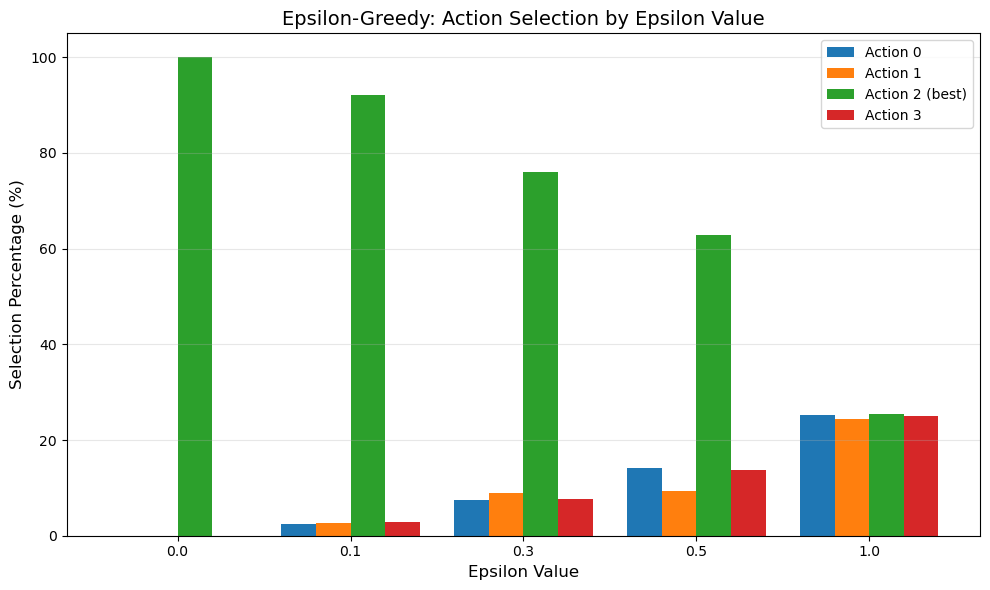


✅ Impact visualization complete!


In [4]:
print("\n" + "=" * 60)
print("Part 3: Visualizing Impact of Different Epsilon Values")
print("=" * 60)

# Test different epsilon values
epsilon_values = [0.0, 0.1, 0.3, 0.5, 1.0]
n_steps = 1000
n_actions = 4
q_values = np.array([0.1, 0.3, 0.5, 0.2])
best_action = np.argmax(q_values)

results = {}

for epsilon in epsilon_values:
    action_counts = np.zeros(n_actions)
    for _ in range(n_steps):
        action = epsilon_greedy_action(q_values, epsilon, n_actions)
        action_counts[action] += 1
    results[epsilon] = action_counts / n_steps

print("\nAction selection percentages for different epsilon values:")
print("Action | ε=0.0 | ε=0.1 | ε=0.3 | ε=0.5 | ε=1.0")
print("-" * 50)
for i in range(n_actions):
    percentages = [f"{results[eps][i]*100:.1f}%" for eps in epsilon_values]
    marker = " ⭐" if i == best_action else ""
    print(f"  {i}{marker:3s} | {' | '.join(percentages)}")

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(epsilon_values))
width = 0.2

for i in range(n_actions):
    percentages = [results[eps][i] * 100 for eps in epsilon_values]
    ax.bar(x + i*width, percentages, width, label=f'Action {i}{" (best)" if i == best_action else ""}')

ax.set_xlabel('Epsilon Value', fontsize=12)
ax.set_ylabel('Selection Percentage (%)', fontsize=12)
ax.set_title('Epsilon-Greedy: Action Selection by Epsilon Value', fontsize=14)
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels([str(eps) for eps in epsilon_values])
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\n✅ Impact visualization complete!")

## Part 4: Epsilon Decay Strategy



Part 4: Epsilon Decay Strategy


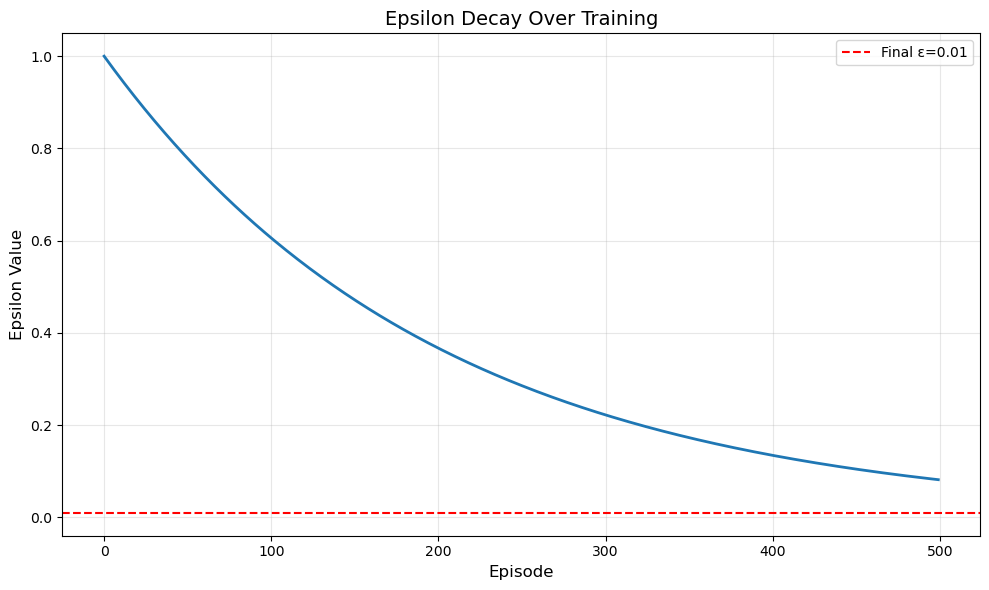


Epsilon Decay:
  Initial ε: 1.0
  Final ε: 0.01
  Decay rate: 0.995
  Episodes: 500
  ε at episode 100: 0.6058
  ε at episode 250: 0.2856
  ε at episode 500: 0.0820

✅ Epsilon decay strategy complete!


In [5]:
print("\n" + "=" * 60)
print("Part 4: Epsilon Decay Strategy")
print("=" * 60)

def epsilon_decay(initial_epsilon, final_epsilon, decay_rate, episode):
    """
    Calculate epsilon with exponential decay.
    
    Args:
        initial_epsilon: Starting epsilon value
        final_epsilon: Minimum epsilon value
        decay_rate: Decay rate (0.0 to 1.0)
        episode: Current episode number
    
    Returns:
        Decayed epsilon value
    """
    return max(final_epsilon, initial_epsilon * (decay_rate ** episode))

# Simulate epsilon decay over training
initial_epsilon = 1.0
final_epsilon = 0.01
decay_rate = 0.995
n_episodes = 500

epsilon_history = []
for episode in range(n_episodes):
    epsilon = epsilon_decay(initial_epsilon, final_epsilon, decay_rate, episode)
    epsilon_history.append(epsilon)

# Visualize epsilon decay
plt.figure(figsize=(10, 6))
plt.plot(epsilon_history, linewidth=2)
plt.xlabel('Episode', fontsize=12)
plt.ylabel('Epsilon Value', fontsize=12)
plt.title('Epsilon Decay Over Training', fontsize=14)
plt.grid(True, alpha=0.3)
plt.axhline(y=final_epsilon, color='r', linestyle='--', label=f'Final ε={final_epsilon}')
plt.legend()
plt.tight_layout()
plt.show()

print(f"\nEpsilon Decay:")
print(f"  Initial ε: {initial_epsilon}")
print(f"  Final ε: {final_epsilon}")
print(f"  Decay rate: {decay_rate}")
print(f"  Episodes: {n_episodes}")
print(f"  ε at episode 100: {epsilon_history[100]:.4f}")
print(f"  ε at episode 250: {epsilon_history[250]:.4f}")
print(f"  ε at episode 500: {epsilon_history[499]:.4f}")

print("\n✅ Epsilon decay strategy complete!")

## Summary

### Key Concepts:
1. **Exploration-Exploitation Dilemma**: Balance between trying new actions vs. using known good actions
2. **Epsilon-Greedy**: Simple strategy that explores with probability ε, exploits otherwise
3. **Epsilon Decay**: Gradually reduce exploration as agent learns (start high, end low)
4. **Trade-off**: High ε = more exploration but slower convergence; Low ε = faster convergence but may miss optimal actions

### Implementation:
- **Epsilon-Greedy Function**: Choose random action with probability ε, otherwise greedy
- **Epsilon Decay**: Exponential or linear decay from initial to final epsilon
- **Common Values**: ε_start = 1.0, ε_end = 0.01, decay = 0.995

### Best Practices:
- Start with high epsilon (1.0) for exploration
- Gradually decrease epsilon during training
- Use epsilon decay schedules (exponential or linear)
- Monitor exploration vs exploitation balance

### Applications:
- Q-learning and SARSA algorithms
- Multi-armed bandit problems
- Any RL algorithm needing exploration

**Reference:** Course 09, Unit 1: "Introduction to Reinforcement Learning" - Exploration strategies practical content